Plotting the Condition Number of Problem 1 b)

/tmp/ipykernel_37945/315274778.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  [(m + 1) / 2,  (m + 1)**2 / (3 * m)]


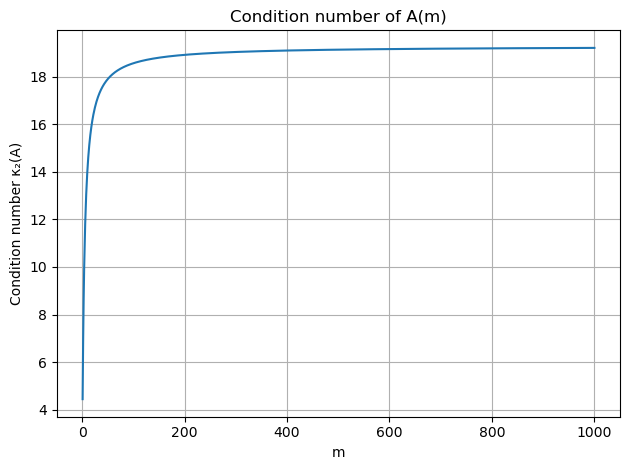

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def cond_number(m):

    """
    This function computes the condition number of the matrix A(m) in the 2-norm. The matrix A is defined.

    Args:
        m (float): parameter for the matrix A(m)
    Returns:
        float: condition number of A(m)
    Raises:
        ZeroDivisionError: if m = 0
        np.linalg.LinAlgError: if A(m) is not invertible
    """

    A = np.array([
        [m + 1,          (m + 1) / 2],
        [(m + 1) / 2,  (m + 1)**2 / (3 * m)]
    ])
    A_inv = np.linalg.inv(A)
    return np.linalg.norm(A, 2) * np.linalg.norm(A_inv, 2)

def main(): 
    M = float(input("Enter maximum m (M > 0): "))
    N = int(input("Enter number of sample points: ")) #however the user wants to plot 

    m_vals = np.linspace(0, M, N)
    conds  = []

    for m in m_vals:
        try:
            conds.append(cond_number(m))
        except (ZeroDivisionError, np.linalg.LinAlgError):
            conds.append(np.inf) #if it is not invertible

    plt.figure()
    plt.plot(m_vals, conds)
    plt.xlabel('m')
    plt.ylabel('Condition number κ₂(A)')
    plt.title('Condition number of A(m)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

poly_ls(m,n) -> problem 1 c)

In [ ]:
import numpy as np

def poly_ls(m, n):

    """
    Builds the (n+1) x (n+1) matrix A for least-squares polynomial fitting.
    
    Args:
        m (int): number of subintervals (m >= 0)
        n (int): polynomial degree (n >= 0)
    Returns:
        np.ndarray: shape (n+1, n+1) Gram matrix
    Raises:
        ValueError: if m or n is negative or not integer
    """

    if not isinstance(m, int) or not isinstance(n, int):
        raise ValueError("m and n must be integers")
    if m < 0 or n < 0:
        raise ValueError("m and n must be non-negative")

    x = np.linspace(0, 1, m+1) #sample space

    A = np.zeros((n+1, n+1), dtype=float) #intializes 0 matrix to be filled
    np.set_printoptions(precision=3, suppress=True)
    for j in range(n+1):
        for k in range(n+1):
            A[j, k] = np.sum(x**(j + k)) #fills each entry

    return A

for m, n in [(1, 1), (2, 2), (2, 3)]: #trivial examples
    M = poly_ls(m, n)
    print(f"m = {m}, n = {n}:")
    print(M, end="\n\n")


m = 1, n = 1:
[[2. 1.]
 [1. 1.]]

m = 2, n = 2:
[[3.    1.5   1.25 ]
 [1.5   1.25  1.125]
 [1.25  1.125 1.062]]

m = 2, n = 3:
[[3.    1.5   1.25  1.125]
 [1.5   1.25  1.125 1.062]
 [1.25  1.125 1.062 1.031]
 [1.125 1.062 1.031 1.016]]



Condition Variance With Perturbations (1e)

Condition numbers of A (m=100) for degree n:
  n =  1 → κ₂(A) = 1.891 * 10^1
  n =  2 → κ₂(A) = 5.047 * 10^2
  n =  3 → κ₂(A) = 1.467 * 10^4
  n =  4 → κ₂(A) = 4.428 * 10^5
  n =  5 → κ₂(A) = 1.366 * 10^7
  n =  6 → κ₂(A) = 4.274 * 10^8
  n =  7 → κ₂(A) = 1.352 * 10^10
  n =  8 → κ₂(A) = 4.312 * 10^11
  n =  9 → κ₂(A) = 1.386 * 10^13
  n = 10 → κ₂(A) = 4.483 * 10^14
  n = 11 → κ₂(A) = 1.594 * 10^16
  n = 12 → κ₂(A) = 1.841 * 10^18
  n = 13 → κ₂(A) = 4.871 * 10^17
  n = 14 → κ₂(A) = 1.144 * 10^18
  n = 15 → κ₂(A) = 4.695 * 10^17
  n = 16 → κ₂(A) = 3.664 * 10^17
  n = 17 → κ₂(A) = 3.683 * 10^17
  n = 18 → κ₂(A) = 1.165 * 10^18
  n = 19 → κ₂(A) = 7.725 * 10^17
  n = 20 → κ₂(A) = 2.029 * 10^18


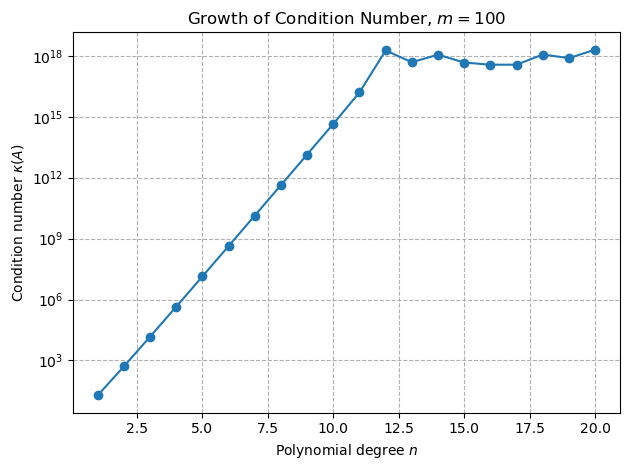

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def format_scientific(x, sig=3):

    """
    Formats a number in scientific notation with a specified number of significant digits.

    Args:
        x (float): number to format
        sig (int): number of significant digits (default: 3)
    Returns:
        str: formatted string in scientific notation
    """

    if x == 0:
        return "0"
    exp = int(np.floor(np.log10(abs(x))))
    mant = x / 10**exp
    return f"{mant:.{sig}f} * 10^{exp}"

def compute_condition_numbers(m, max_n):

    """
    Returns a list of the condition numbers of the polynomial least-squares matrix A(m) for degrees n = 1 to max_n.

    Args:
        m (int): number of subintervals (m >= 0)
        max_n (int): maximum polynomial degree (max_n >= 0)
    Returns:
        list: condition numbers of A(m) for degrees n = 1 to max_n
    """

    conds = []
    for n in range(1, max_n + 1):
        A = poly_ls(m, n) 
        sv = np.linalg.svd(A, compute_uv=False) #computes singular values
        conds.append(sv[0] / sv[-1]) #condition number is the ratio of the largest to smallest singular value.
    return conds

if __name__ == "__main__":
    m = 100
    max_n = 20

    cond_nums = compute_condition_numbers(m, max_n)
    n_values = np.arange(1, max_n + 1)

    print(f"Condition numbers of A (m={m}) for degree n:")
    for n, c in zip(n_values, cond_nums):
        print(f"  n = {n:2d} → κ₂(A) = {format_scientific(c)}")

    plt.figure()
    plt.semilogy(n_values, cond_nums, marker="o", linestyle="-")
    plt.xlabel("Polynomial degree $n$")
    plt.ylabel("Condition number $\\kappa(A)$")
    plt.title(f"Growth of Condition Number, $m={m}$")
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()


How The Matrix Changes With a Different Dataset

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def poly_ls_2(m, n):

    """
    Builds the (n+1) x (n+1) matrix for least-squares polynomial fitting.

    Args:
        m (int): number of subintervals (m >= 0)
        n (int): polynomial degree (n >= 0)
    Returns:
        np.ndarray: shape (n+1, n+1) Gram matrix
    Raises:
        ValueError: if m or n is negative or not integer
    """

    if not (isinstance(m, int) and isinstance(n, int)) or m < 0 or n < 0:
        raise ValueError("m and n must be non-negative integers")

    t = np.linspace(0, 1, m + 1) - 0.5 
    powers = t[:, None] ** np.arange(2 * n + 1) 
    col_sums = powers.sum(axis=0)
    M = np.empty((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(n + 1):
            M[i, j] = col_sums[i + j] #fills each entry

    return M

#Examples:
for m, n in [(2, 1), (2, 2), (2, 3)]: #trivial examples
    M = poly_ls_2(m, n)
    print(f"m = {m}, n = {n}:")
    print(M, end="\n\n")


m = 2, n = 1:
[[3.  0. ]
 [0.  0.5]]

m = 2, n = 2:
[[3.    0.    0.5  ]
 [0.    0.5   0.   ]
 [0.5   0.    0.125]]

m = 2, n = 3:
[[3.    0.    0.5   0.   ]
 [0.    0.5   0.    0.125]
 [0.5   0.    0.125 0.   ]
 [0.    0.125 0.    0.031]]



Condition Analysis With a Different Dataset (1f)

Condition numbers at (m = 100)
  n =  1 → κ(G) = 1.176 * 10^1
  n =  2 → κ(G) = 1.756 * 10^2
  n =  3 → κ(G) = 2.723 * 10^3
  n =  4 → κ(G) = 4.312 * 10^4
  n =  5 → κ(G) = 6.922 * 10^5
  n =  6 → κ(G) = 1.123 * 10^7
  n =  7 → κ(G) = 1.840 * 10^8
  n =  8 → κ(G) = 3.040 * 10^9
  n =  9 → κ(G) = 5.060 * 10^10
  n = 10 → κ(G) = 8.482 * 10^11
  n = 11 → κ(G) = 1.432 * 10^13
  n = 12 → κ(G) = 2.432 * 10^14
  n = 13 → κ(G) = 4.156 * 10^15
  n = 14 → κ(G) = 7.144 * 10^16
  n = 15 → κ(G) = 1.235 * 10^18
  n = 16 → κ(G) = 2.147 * 10^19
  n = 17 → κ(G) = 3.754 * 10^20
  n = 18 → κ(G) = 6.758 * 10^21
  n = 19 → κ(G) = 1.168 * 10^23
  n = 20 → κ(G) = 1.390 * 10^24


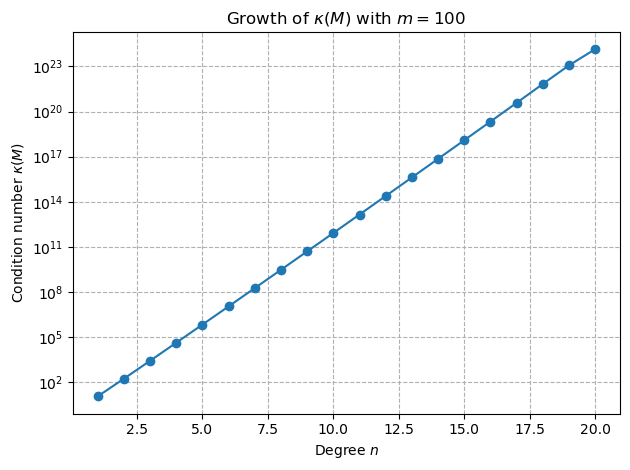

In [55]:
def compute_condition_numbers_centered(m: int, max_n: int):

    """
    Computes the condition numbers of the polynomial least-squares matrix M(m) for degrees n = 1 to max_n.

    Args:
        m (int): number of subintervals (m >= 0)
        max_n (int): maximum polynomial degree (max_n >= 0)
    Returns:
        list: condition numbers of M(m) for degrees n = 1 to max_n
    """

    conds = []
    for n in range(1, max_n + 1):
        M  = poly_ls_2(m, n)
        s  = np.linalg.svd(M, compute_uv=False) #computes singular values
        conds.append(s[0] / s[-1]) #κ = σ_max / σ_min
    return conds

m, max_n = 100, 20

cond_nums = compute_condition_numbers_centered(m, max_n)
n_values  = np.arange(1, max_n + 1)

print(f"Condition numbers at (m = {m})")
for n, κ in zip(n_values, cond_nums):
    print(f"  n = {n:2d} → κ(G) = {format_scientific(κ)}")

plt.figure()
plt.semilogy(n_values, cond_nums, marker="o")
plt.xlabel("Degree $n$")
plt.ylabel(r"Condition number $\kappa(M)$")
plt.title(fr"Growth of $\kappa(M)$ with $m = 100$")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


Least Squares With some Decompositions
